# The Tau Collections

Taus are complex jet-like objects that are reconstructed with their own algorithms.

In [1]:
import matplotlib.pyplot as plt
from config import ds_ztautau as ds
import awkward as ak
from helpers import match_objects

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


By default we fetch tau-jets from the `Tight` working point (you can change the working point by passing the `working_point` argument).

In [2]:
taus = (ds
        .SelectMany(lambda e: e.TauJets("TauJets"))
        .Select(lambda t: t.pt() / 1000.0)
        .AsAwkwardArray('tau_pt')
        .value())

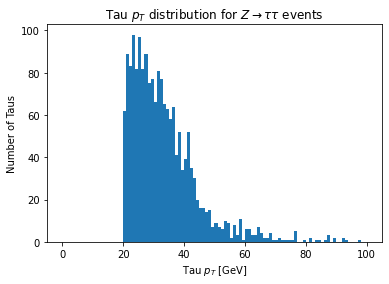

In [3]:
plt.hist(taus.tau_pt, bins=100, range=(0, 100))
plt.xlabel('Tau $p_T$ [GeV]')
plt.ylabel('Number of Taus')
_ = plt.title('Tau $p_T$ distribution for $Z\\rightarrow \\tau \\tau$ events')

## Calibration

By default the taus we pulled from above are calibrated, and the best central value for the tau collection you request is returned. This section shows you how to:

* Pull out the raw, uncalibrated taus
* How to get a particular systematic variation

Because we want to do a comparison, and the tau corrections change the number of tau jets, we will need to do tau matching in $\eta-\phi$ space. Lets get the default calibration with eta and phi:

In [4]:
taus = (ds
        .Select(lambda e: e.TauJets("TauJets"))
        .Select(lambda taus: {
            'pt': taus.Select(lambda t: t.pt() / 1000.0),
            'eta': taus.Select(lambda t: t.eta()),
            'phi': taus.Select(lambda t: t.phi()),
        })
        .AsAwkwardArray()
        .value())

To grab the raw jets (without calibration) we just set the `calibrated` parameter to `None` (there is very little reason one will do this normally):

In [5]:
raw_taus = (ds
            .Select(lambda e: e.TauJets("TauJets", calibration=None))
            .Select(lambda taus: {
                'pt': taus.Select(lambda t: t.pt() / 1000.0),
                'eta': taus.Select(lambda t: t.eta()),
                'phi': taus.Select(lambda t: t.phi()),
            })
            .AsAwkwardArray()
            .value())

The number of taus and the number of calibrated taus are quite different, so we'll need to match them in $\eta$ and $\phi$:

In [6]:
raw_taus_matched = match_objects(taus, raw_taus)

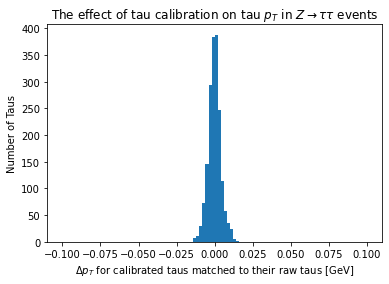

In [7]:
plt.hist(ak.flatten(taus.pt-raw_taus_matched.pt)/1000.0, bins=100, range=(-0.1, 0.1))
plt.xlabel('$\Delta p_T$ for calibrated taus matched to their raw taus [GeV]')
plt.ylabel('Number of Taus')
_ = plt.title('The effect of tau calibration on tau $p_T$ in $Z\\rightarrow \\tau\\tau$ events')

If we instead want a particular systematic error, we need only name that error to get it back. Knowing what the names of the systematic errors, however, is not something that can be programmatically determined ahead of time. See the further information section at the end of this chapter to links to the ATLAS jet calibration info twiki.

In [8]:
sys_taus = (ds
           .Select(lambda e: e.TauJets("TauJets", calibration="TAUS_TRUEHADTAU_SME_TES_DETECTOR__1up"))
           .Select(lambda taus: {
               'pt': taus.Select(lambda t: t.pt() / 1000.0),
               'eta': taus.Select(lambda t: t.eta()),
               'phi': taus.Select(lambda t: t.phi()),
            })
           .AsAwkwardArray()
           .value())

In [9]:
sys_taus_matched = match_objects(taus, sys_taus)

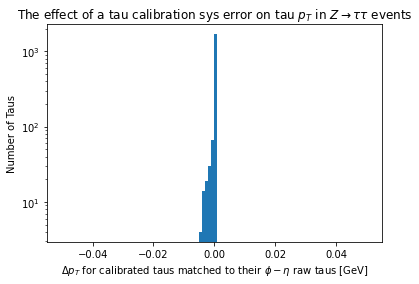

In [10]:
plt.hist(ak.flatten(taus.pt-sys_taus_matched.pt)/1000.0, bins=100, range=(-0.05, 0.05))
plt.xlabel('$\Delta p_T$ for calibrated taus matched to their $\phi-\eta$ raw taus [GeV]')
plt.ylabel('Number of Taus')
plt.yscale('log')
_ = plt.title('The effect of a tau calibration sys error on tau $p_T$ in $Z\\rightarrow \\tau\\tau$ events')

## The Datamodel

The data model when this documentation was last built was:

In [11]:
from func_adl_servicex_xaodr21.xAOD.taujet_v3 import TauJet_v3
help(TauJet_v3)

Help on class TauJet_v3 in module func_adl_servicex_xaodr21.xAOD.taujet_v3:

class TauJet_v3(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  ROIWord(self) -> 'int'
 |      A method
 |  
 |  allTauTrackLinks(self) -> 'func_adl_servicex_xaodr21.vector_elementlink_datavector_xaod_tautrack_v1___.vector_ElementLink_DataVector_xAOD_TauTrack_v1___'
 |      A method
 |  
 |  allTauTrackLinksNonConst(self) -> 'func_adl_servicex_xaodr21.vector_elementlink_datavector_xaod_tautrack_v1___.vector_ElementLink_DataVector_xAOD_TauTrack_v1___'
 |      A method
 |  
 |  charge(self) -> 'float'
 |      A method
 |  
 |  chargedPFO(self, i: 'int') -> 'func_adl_servicex_xaodr21.xAOD.pfo_v1.PFO_v1'
 |      A method
 |  
 |  chargedPFOLinks(self) -> 'func_adl_servicex_xaodr21.vector_elementlink_datavector_xaod_pfo_v1___.vector_ElementLink_DataVector_xAOD_PFO_v1___'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  cluster(self, i: 'int') -> 'func_adl_ser

## Further Information

* The [`xAOD::TauJet_v3` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTau/xAODTau/versions/TauJet_v3.h) with all the inline documentation.
* The [Tau Recommendation Pages for R21](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/TauRecommendationsR21) on the ATLAS TWiki